In [1]:

import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression

In [2]:
# Making sure that the features have proper data format
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

# Reading the csv files using panda
data_csv = pd.read_csv('kc_house_data.csv',dtype=dtype_dict)
train_csv = pd.read_csv('kc_house_train_data.csv',dtype=dtype_dict)
test_csv = pd.read_csv('kc_house_test_data.csv',dtype=dtype_dict)

# Conversting the csv data to the dataframe and deleting the extra columns which are not relevant

house_train = pd.DataFrame(train_csv)
train_data = house_train.drop(['price','id','date'],axis=1)
house_test = pd.DataFrame(test_csv)
test_data  = house_test.drop(['price','id','date'],axis=1)

# Creating a polynomial_dframe function 

Next we're going to write a polynomial function that takes an array and a maximal degree and returns an DataFrame with columns containing the array to all the powers up to the maximal degree.


In [3]:
def polynomial_dframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_dframe = pd.DataFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_dframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_dframe[name] = feature**power

    return poly_dframe
    

In [4]:
tmp = np.array([1.,2.,3.])
print polynomial_dframe(tmp, 3)

   power_1  power_2  power_3
0      1.0      1.0      1.0
1      2.0      4.0      8.0
2      3.0      9.0     27.0


# Visualizing polynomial regression

Let's use matplotlib to visualize what a polynomial regression looks like on some real data.

   power_1  estimatedCoeffecients
0   1180.0              281.95884


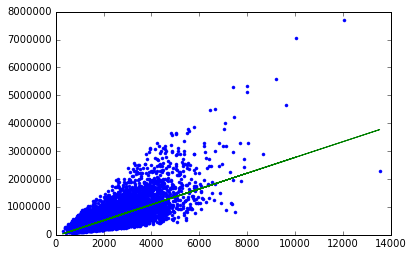

In [5]:
## Calling polynomial function for the feature sqft_living with 1 order power

poly1_data = polynomial_dframe(train_data.sqft_living, 1)

# Training the model for the above dataframe 

model1 = LinearRegression()
#fitting the model1 with the model_2_features data and the target is 'price'
model1.fit(poly1_data[['power_1']],train_csv.price)

#print the coeffecient of the learned model

print pd.DataFrame(zip(poly1_data['power_1'],model1.coef_),columns=['power_1','estimatedCoeffecients'])

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poly1_data['power_1'],train_csv['price'],'.',
        poly1_data['power_1'], model1.predict(poly1_data),'-')

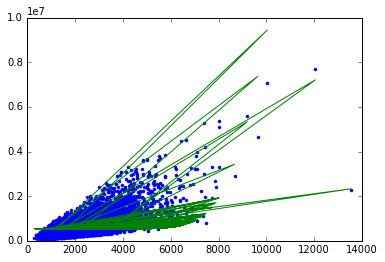

In [13]:
## Calling polynomial function for the feature sqft_living with 1 order power

poly15_data = polynomial_dframe(train_data.sqft_living, 15)
my_features = poly15_data.columns.values # get the name of the features
# Training the model for the above dataframe 

model15 = LinearRegression()
#fitting the model1 with the model_2_features data and the target is 'price'
model15.fit(poly15_data[my_features],train_csv.price)

#plot the resulting curve
plt.plot(poly15_data['power_1'],train_csv['price'],'.',
        poly15_data['power_1'], model15.predict(poly15_data),'-')